In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import mlab
import numpy as np
import random

In [3]:
filepath = "Neighborhood_zhvi_uc_sfr_sm_sa_month.csv"
house=pd.read_csv(filepath)

In [4]:
house = house.drop(["RegionID", "SizeRank", "StateName", "Metro"], axis=1)

In [5]:
house1=house.bfill(axis=1)

In [6]:
#Create New Columns for Rate of Change
house1["Rate of Change 10year"]=(house1["2024-05-31"]-house1["2014-05-31"])/house1["2014-05-31"]
house1["Rate of Change 5year"]=(house1["2024-05-31"]-house1["2019-05-31"])/house1["2019-05-31"]
house1["Rate of Change 3year"]=(house1["2024-05-31"]-house1["2021-05-31"])/house1["2021-05-31"]

In [7]:
house1.head()

,RegionName,RegionType,State,City,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,Rate of Change 10year,Rate of Change 5year,Rate of Change 3year
0,Maryvale,neighborhood,AZ,Phoenix,Maricopa County,74881.832939,75131.887537,75462.404768,76154.750202,76909.71484,...,339954.241784,341529.174026,342538.000345,343541.048461,345014.768505,346849.732954,348307.794657,2.266063,0.764164,0.286772
1,Paradise,neighborhood,NV,Las Vegas,Clark County,154081.094763,154065.268225,154365.804275,155025.6359,155889.21694,...,422345.354397,424692.216337,426759.192977,428871.65356,431212.551877,434295.107543,437500.63255,1.347283,0.477932,0.271924
2,Upper West Side,neighborhood,NY,New York,New York County,1804966.539419,1804966.539419,1804966.539419,1804966.539419,1804966.539419,...,2872936.843896,2824419.763433,2786026.173339,2755854.050861,2742296.658033,2730449.375076,2722321.395482,0.052959,-0.150671,0.008391
3,Upper East Side,neighborhood,NY,New York,New York County,3083477.253048,3070016.447376,3067172.497797,3056942.511904,3035548.866719,...,4245297.25676,4192592.945891,4147253.041297,4105948.832461,4069753.584109,4035867.348324,4002781.731903,-0.291271,-0.289257,-0.129436
4,South Los Angeles,neighborhood,CA,Los Angeles,Los Angeles County,132603.243267,132732.451329,133073.266333,133850.047161,134893.250775,...,709013.848275,713149.615836,710778.2145,704235.733036,697549.809696,695134.007928,695184.963846,1.480787,0.403503,0.141531


In [8]:
#Get Top 50 Neighborhoods by 5 Year Rate of Change
top_50 = house1.sort_values(by=['Rate of Change 5year'], ascending=False)
top_50

,RegionName,RegionType,State,City,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,Rate of Change 10year,Rate of Change 5year,Rate of Change 3year
19353,South Flagler Drive,neighborhood,FL,Palm Beach,Palm Beach County,1622343.361798,1622343.361798,1622343.361798,1622343.361798,1622343.361798,...,5473396.471376,5469534.41947,5484605.155893,5502358.127518,5532800.88541,5567787.863731,5615208.745055,2.461172,2.118833,1.063427
7144,Walnut-Orange-Walsh,neighborhood,CT,Waterbury,New Haven County,70878.244703,70878.244703,70878.244703,70878.244703,70878.244703,...,160406.575474,161622.341843,163865.770179,166483.550078,169858.400185,172574.383715,175068.675871,3.580897,1.903134,0.627208
6282,Wilbur I,neighborhood,NJ,Trenton,Mercer County,60366.112896,61175.225524,61863.086502,64025.274344,65580.462872,...,133479.046299,135207.938409,136596.995927,137687.681718,139825.35557,142693.682916,144850.852751,2.218627,1.799132,0.700971
17651,Strugglers Hill,neighborhood,KS,Kansas City,Wyandotte County,23657.048759,23657.048759,23657.048759,23657.048759,23657.048759,...,114208.245367,115110.340343,115576.838316,116488.774825,118355.88801,120852.323101,123375.821286,5.780318,1.795246,0.493546
16238,Quindaro,neighborhood,KS,Kansas City,Wyandotte County,12607.055184,12607.055184,12607.055184,12607.055184,12607.055184,...,113613.366608,114691.26791,115704.863064,116582.2647,118350.534681,120529.086229,122274.476485,5.584625,1.76705,0.468716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,East Jerusalem,neighborhood,MS,Hattiesburg,Forrest County,70222.836901,70222.836901,70222.836901,70222.836901,70222.836901,...,56486.474213,56043.774966,55493.020284,55361.440207,55791.967416,56951.485026,58945.136033,-0.160599,-0.280101,-0.245213
3,Upper East Side,neighborhood,NY,New York,New York County,3083477.253048,3070016.447376,3067172.497797,3056942.511904,3035548.866719,...,4245297.25676,4192592.945891,4147253.041297,4105948.832461,4069753.584109,4035867.348324,4002781.731903,-0.291271,-0.289257,-0.129436
7243,Presidio,neighborhood,CA,San Francisco,San Francisco County,1060874.676094,1060874.676094,1060874.676094,1060874.676094,1060874.676094,...,1963061.575048,1914008.189099,1886025.745858,1876797.714905,1860527.909744,1842517.532132,1822956.829133,0.082849,-0.297049,-0.336166
418,Murray Hill,neighborhood,NY,New York,New York County,1413298.681051,1413298.681051,1413298.681051,1413298.681051,1413298.681051,...,1561886.396708,1557668.939541,1554378.185767,1552245.509108,1551845.905645,1560869.977851,1568620.637066,-0.121135,-0.303996,0.044895


In [9]:
#Plotting all Neighborhoods based on 5 Year Rate of Change
alldf=top_50[['RegionName', 'City', 'State','Rate of Change 5year']].sort_values(by=('Rate of Change 5year'), ascending=False)
alldf=alldf.sort_values(by=('State'), ascending=True)
alldf['%']=alldf['Rate of Change 5year'].apply(lambda x: x*100)

In [10]:
#Assign x and y axes
x_all=alldf['RegionName']
y_all=alldf['%']

In [11]:
alldf.describe()

,%
count,23917.000000
mean,48.145697
std,24.813353
min,-44.218375
25%,34.950104
50%,49.987448
75%,63.419031
max,211.883294


In [12]:
#Stats
stats=np.percentile((alldf['%']), range(0,125,25))
stats
min=stats[0]
pct25=stats[1]
mean_all=np.mean(y_all)
pct75=stats[3]
max=stats[4]

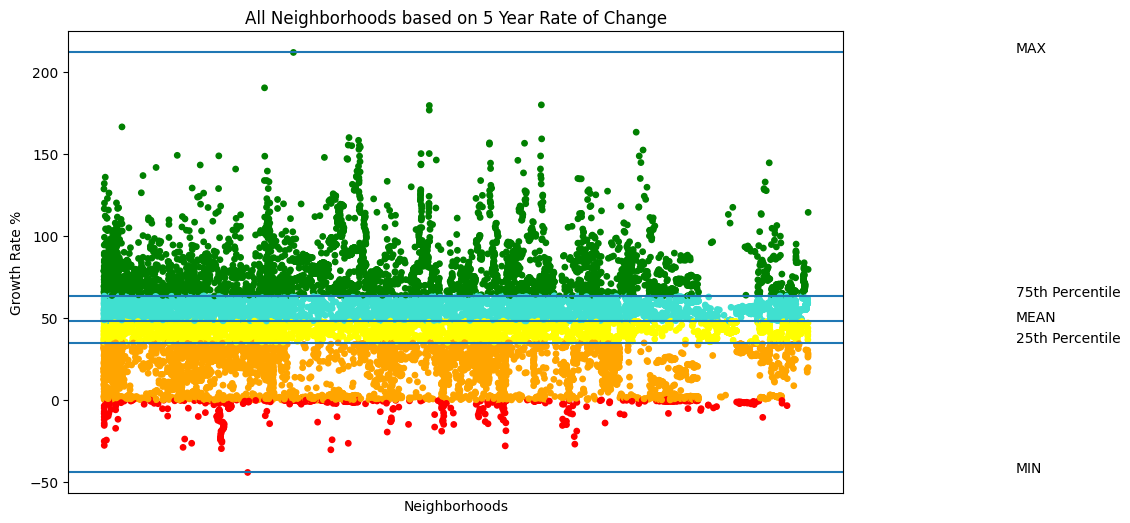

In [30]:
#Chart Size
plt.figure(figsize = (10, 6))  

#Colorcode data points
conditions  = [ (y_all<=max) & (y_all>pct75), (y_all<=pct75) & (y_all>mean_all), (y_all<=mean_all) & (y_all>pct25), (y_all<=pct25) & (y_all>0), y_all<=0 ]
choices     = [ 'green', 'greenyellow', 'yellow', 'orange', 'red' ]
#choices     = [ 5,4,3,2,1 ]
colorall = np.select(conditions, choices, default=np.nan)

#Plot Neighborhoods
plt.scatter( x_all, y_all, marker = 'o', s = 15, c = colorall) 

#Plot Percentile Lines
minl = plt.axhline(y=min)
plt.text(len(x_all)-10, min, 'MIN', fontsize = 10)

pct25l = plt.axhline(y=pct25)
plt.text(len(x_all), pct25, '25th Percentile', fontsize = 10)

meanl = plt.axhline(y=mean_all)
plt.text(len(x_all), mean_all, 'MEAN', fontsize = 10)

pct75l = plt.axhline(y=pct75)
plt.text(len(x_all), pct75, '75th Percentile', fontsize = 10)

maxl = plt.axhline(y=max)
plt.text(len(x_all), max, 'MAX', fontsize = 10)

#Plot labels
plt.xticks([], rotation = 90)
plt.title("All Neighborhoods based on 5 Year Rate of Change")
plt.ylabel("Growth Rate %")
plt.xlabel("Neighborhoods")
plt.show()

In [252]:
#Simplify DataFrame
plotdf=top_50[['RegionName', 'City', 'State','Rate of Change 5year']].sort_values(by=('Rate of Change 5year'), ascending=False).head(50)

In [253]:
#Group By State
plotdf=plotdf.sort_values(by=('State'), ascending=True)
plotdf['%']=plotdf['Rate of Change 5year'].apply(lambda x: x*100)
plotdf.head()

,RegionName,City,State,Rate of Change 5year,%
7144,Walnut-Orange-Walsh,Waterbury,CT,1.903134,190.313424
9595,Crownbrook,Waterbury,CT,1.486188,148.618788
19353,South Flagler Drive,Palm Beach,FL,2.118833,211.883294
20866,Casler Heights,Saint Petersburg,FL,1.395992,139.599220
3663,South Side,West Palm Beach,FL,1.41754,141.753976


In [254]:
#Percentiles with pandas
plotdf.describe()

,%
count,50.000000
mean,152.276255
std,14.357613
min,136.810461
25%,143.477468
50%,148.704753
75%,155.833542
max,211.883294


In [255]:
#Or numpy
np.percentile((plotdf['%']), range(0,125,25))

array([136.81046073, 143.47746837, 148.7047529 , 155.83354225,
       211.88329367])

In [256]:
#Assign x and y axes

x_axis=plotdf['RegionName']
y_axis=plotdf['%']

In [344]:
#Find Median
median=y_axis.median()

#Find Mean
mean=y_axis.mean()
mean

152.2762545813101

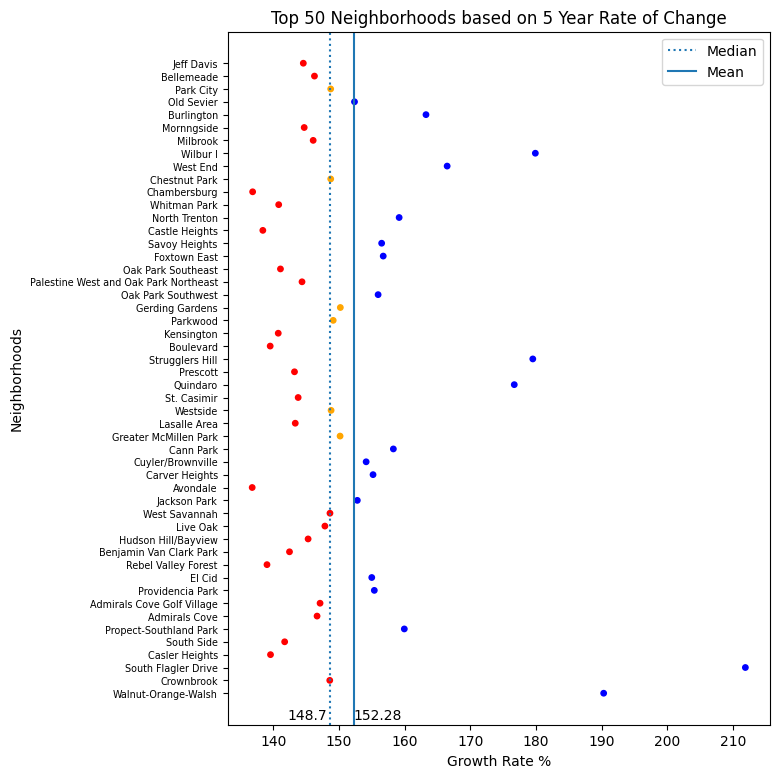

In [351]:
#VERTICAL CHART

#Chart Size
plt.figure(figsize = (7, 9))  

#Color code data points
conditions  = [ y_axis >= mean, (y_axis<mean) & (y_axis>median), y_axis <= median ]
choices     = [ 'blue', 'orange', 'red' ]
    
color = np.select(conditions, choices, default=np.nan)

#Plot Neighborhoods
plt.scatter( y_axis, x_axis, marker = 'o', s = 15, color = color) 

#Plot Median Line
m1 = plt.axvline(x=np.median(y_axis), ls=':')
plt.text(median-6.5, -2, str(round(median,2)), fontsize = 10)

#Plot Mean Line
m2 = plt.axvline(x=np.mean(y_axis))
plt.text(mean, -2, str(round(mean,2)), fontsize = 10)

plt.legend([m1,m2],['Median', 'Mean'],loc = "upper right",fontsize = "medium",fancybox = True)
plt.title("Top 50 Neighborhoods based on 5 Year Rate of Change")
plt.ylabel("Neighborhoods")
plt.yticks(fontfamily='sans-serif', fontsize='x-small')
plt.xlabel("Growth Rate %")

plt.show()

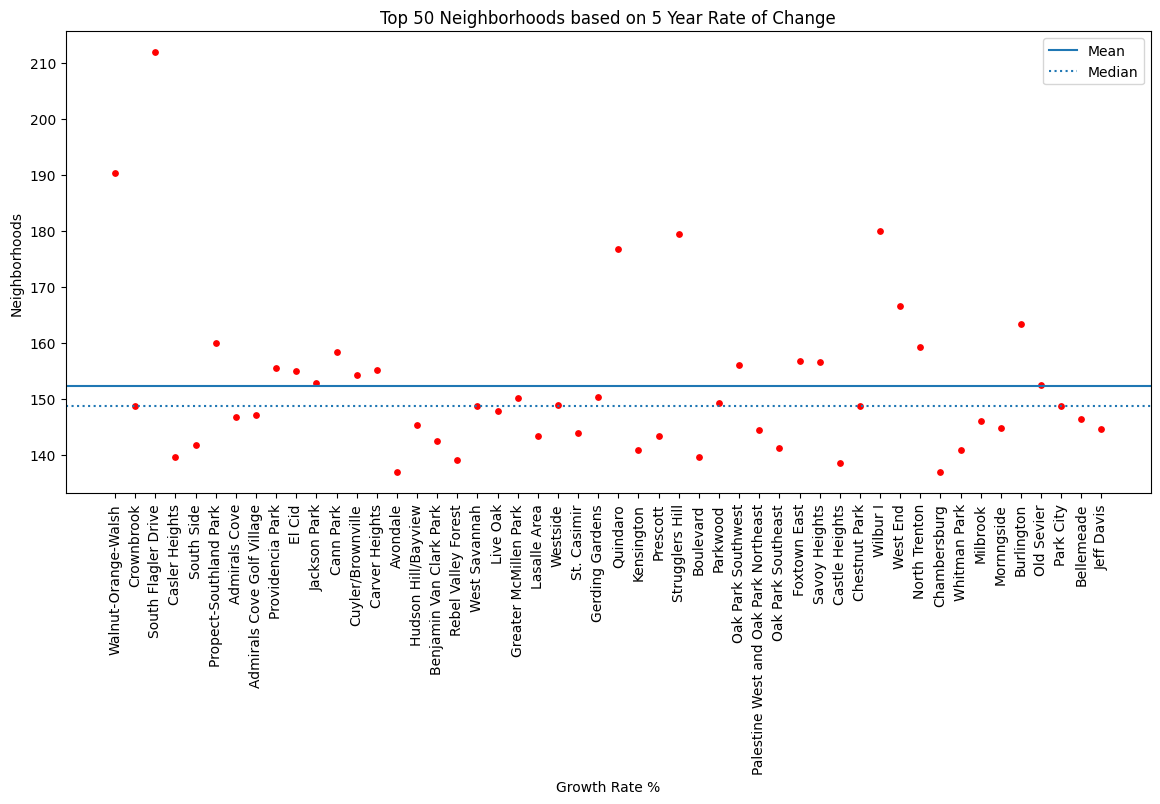

In [228]:
#HORIZONTAL CHART

#Chart Size
plt.figure(figsize = (14, 6))  

#Plot Neighborhoods
plt.scatter( x_axis, y_axis, marker = 'o', s = 15, color = 'red') 

#Plot Median Line
m1 = plt.axhline(y=np.median(y_axis), ls=':')

#Plot Mean Line
m2 = plt.axhline(y=np.mean(y_axis))

#Legend
plt.legend([m2, m1],['Mean','Median'],loc = "upper right",fontsize = "medium",fancybox = True)

plt.xticks(rotation = 90)
plt.title("Top 50 Neighborhoods based on 5 Year Rate of Change")
plt.ylabel("Neighborhoods")
plt.xlabel("Growth Rate %")
plt.show()

In [ ]:
#Tooltips

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):
    
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)
    

def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)
